In [5]:
# # # import pandas as pd
# # # from sklearn.feature_extraction.text import TfidfVectorizer
# # # from sklearn.decomposition import TruncatedSVD
# # # from sklearn.cluster import KMeans
# # # from sklearn.model_selection import train_test_split
# # # from sklearn.metrics import accuracy_score
# # # from sklearn.pipeline import Pipeline
# # # from nltk.corpus import stopwords
# # # from nltk.stem import PorterStemmer
# # # from sklearn.preprocessing import LabelEncoder
# # # from sklearn.linear_model import LogisticRegression

# # # # Load data
# # # data = pd.read_csv('suicide.csv')

# # # # Preprocessing
# # # stop_words = set(stopwords.words('english'))
# # # stemmer = PorterStemmer()

# # # def preprocess_text(text):
# # #     text = text.lower()
# # #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# # #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# # #     return text

# # # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # # Feature extraction
# # # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# # # # Dimensionality reduction
# # # svd = TruncatedSVD(n_components=100)
# # # svd_matrix = svd.fit_transform(tfidf_matrix)

# # # # Clustering
# # # kmeans = KMeans(n_clusters=2, random_state=42)
# # # kmeans.fit(svd_matrix)

# # # # Assign cluster labels
# # # data['cluster_label'] = kmeans.labels_

# # # # Split data into train and test sets
# # # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # # Train classifier
# # # classifier = LogisticRegression()
# # # classifier.fit(X_train, y_train)

# # # # Predictions
# # # y_pred = classifier.predict(X_test)

# # # # Evaluate classifier
# # # accuracy = accuracy_score(y_test, y_pred)
# # # print("Accuracy:", accuracy)

# # import pandas as pd
# # from sklearn.feature_extraction.text import CountVectorizer
# # from sklearn.decomposition import TruncatedSVD
# # from sklearn.cluster import KMeans
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # from sklearn.pipeline import Pipeline
# # from nltk.corpus import stopwords
# # from nltk.stem import PorterStemmer
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.linear_model import LogisticRegression

# # # Load data
# # data = pd.read_csv('suicide.csv')

# # # Preprocessing
# # stop_words = set(stopwords.words('english'))
# # stemmer = PorterStemmer()

# # def preprocess_text(text):
# #     text = text.lower()
# #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# #     return text

# # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # Feature extraction (Bag of Words)
# # count_vectorizer = CountVectorizer(max_features=1000)
# # bow_matrix = count_vectorizer.fit_transform(data['clean_text'])

# # # Dimensionality reduction
# # svd = TruncatedSVD(n_components=100)
# # svd_matrix = svd.fit_transform(bow_matrix)

# # # Clustering
# # kmeans = KMeans(n_clusters=2, random_state=42)
# # kmeans.fit(svd_matrix)

# # # Assign cluster labels
# # data['cluster_label'] = kmeans.labels_

# # # Split data into train and test sets
# # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # Train classifier
# # classifier = LogisticRegression()
# # classifier.fit(X_train, y_train)

# # # Predictions
# # y_pred = classifier.predict(X_test)

# # # Evaluate classifier
# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)


# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Evaluate clustering results (compare with Suicide labels)
# # Implement your evaluation steps here

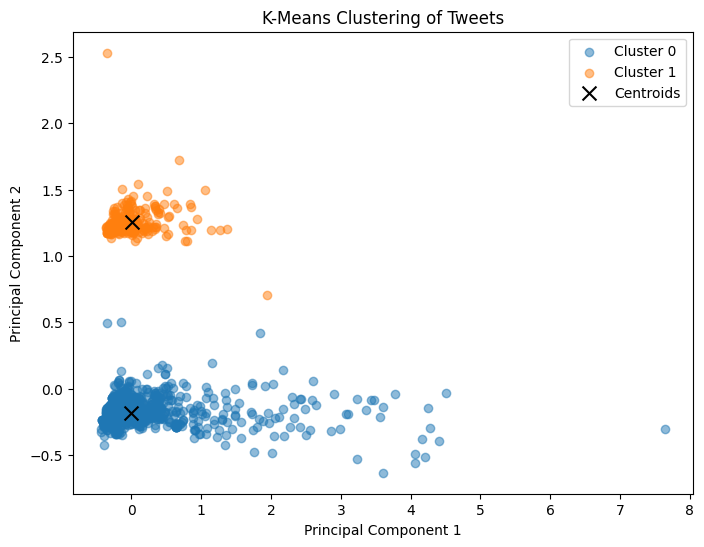

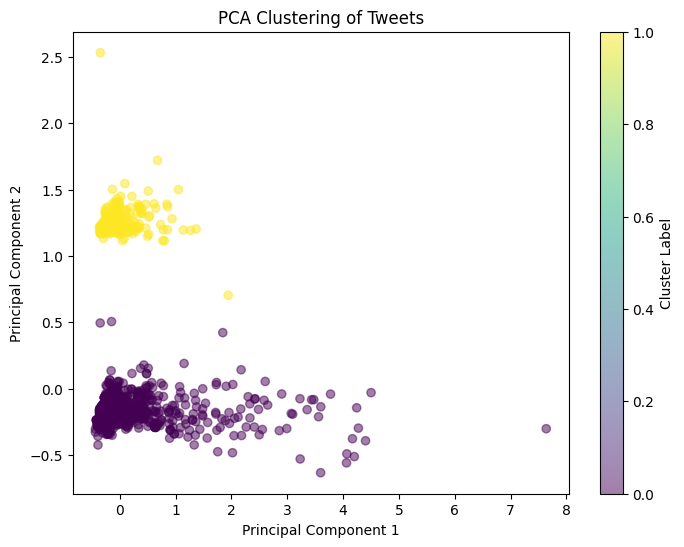

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)


# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('K-Means Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

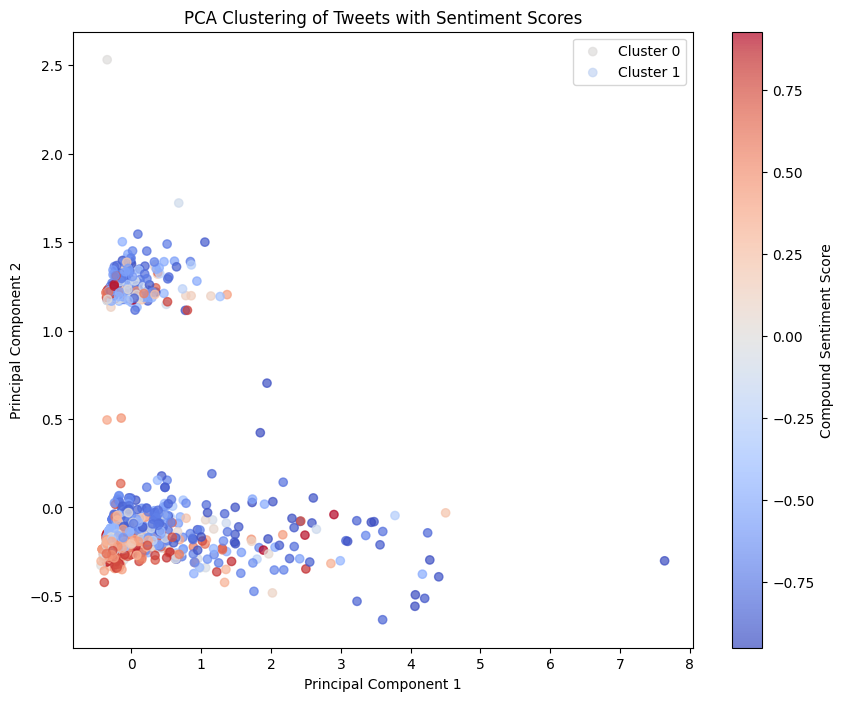

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
data['compound_score'] = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)

# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters with sentiment scores
plt.figure(figsize=(10, 8))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                c=data[data['cluster_label'] == cluster_label]['compound_score'], 
                cmap='coolwarm', alpha=0.7, label=f'Cluster {cluster_label}')

plt.title('PCA Clustering of Tweets with Sentiment Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Compound Sentiment Score')
plt.legend()
plt.show()